## Importar librerías

In [9]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [3]:
nhanes_raw_df = (
    # Cargamos el conjunto de datos en un año en el cual se realizó la encuesta
    nhanes.load.load_NHANES_data(year = "2017-2018")
    # Definimos que las variables utilicen la tipifación snake: general_health
    .clean_names(
        case_type = "snake"
    )
)

nhanes_raw_df.shape

(8366, 197)

Vemos que en el dataset tenemos 8366 observaciones y 197 variables.

## Procesar los datos de NHANES

In [4]:
nhanes_df = (
    # Seleccionamos ciertas columnas de interes
    nhanes_raw_df.select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    # Renombramos las columnas seleccionadas por nombres más entendibles
    .rename_columns(
        {
            "age_in_years_at_screening": "age",
            "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes": "diabetes",
            "60_sec_pulse30_sec_pulse2": "pulse",
            "total_cholesterol_mgdl": "total_cholesterol"
        }
    )
    # Codificamos valores faltantes para algunas variables, por ejemplo, una altura de 9999 es un nan
    .replace(
        {
            "height": {
                9999: np.nan,
                7777: np.nan
            },
            "weight": {
                9999: np.nan,
                7777: np.nan
            },
            "diabetes": {
                "Borderline": np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    # Eliminamos los valores faltantes de la columna diabetes
    .dropna(
        subset = ["diabetes"],
        how = "any"
    )
    # Cambiamos la columna diabetes para que sean valores numéricos
    .transform_column(
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df.shape

(8187, 8)

Luego del procesamiento de los datos quedamos con 8187 observaciones en 8 variables.

## Visualizar los valores faltantes

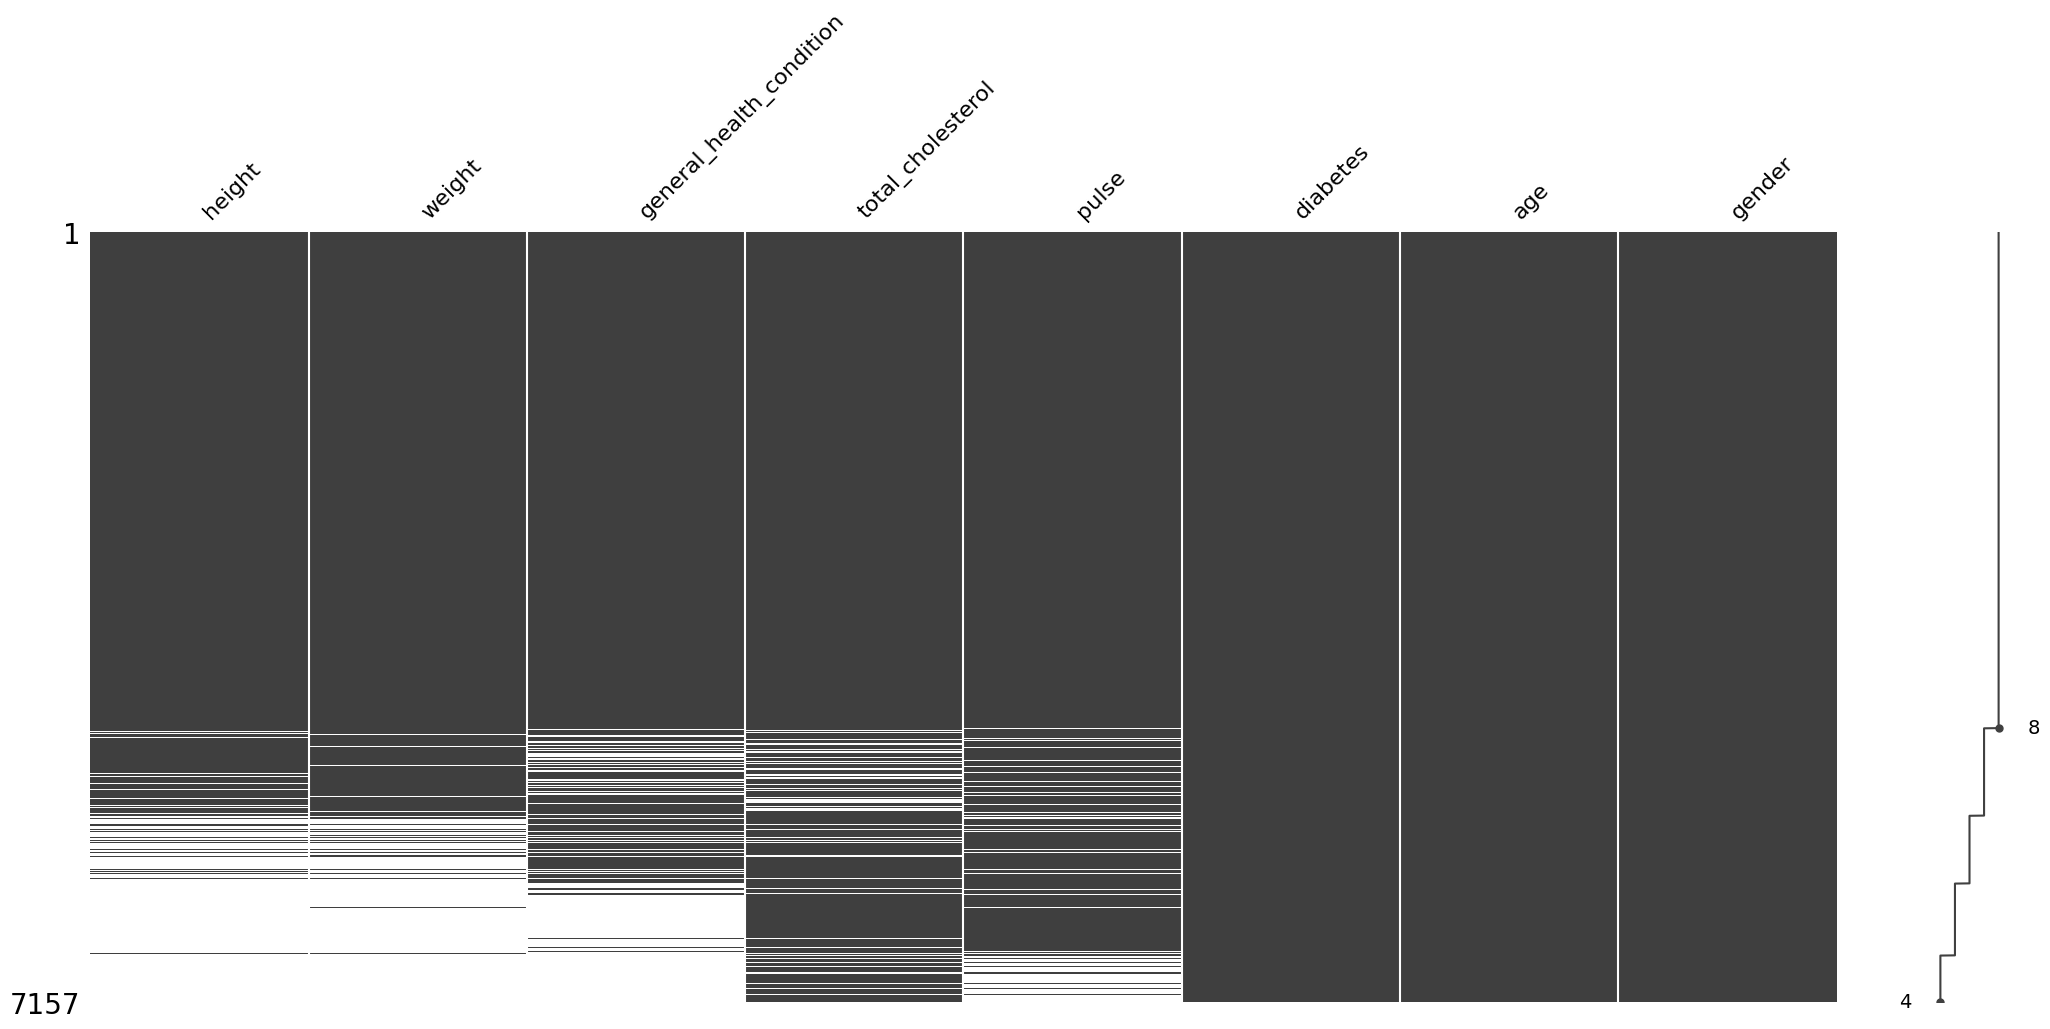

In [10]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort = "descending")
)
plt.show()

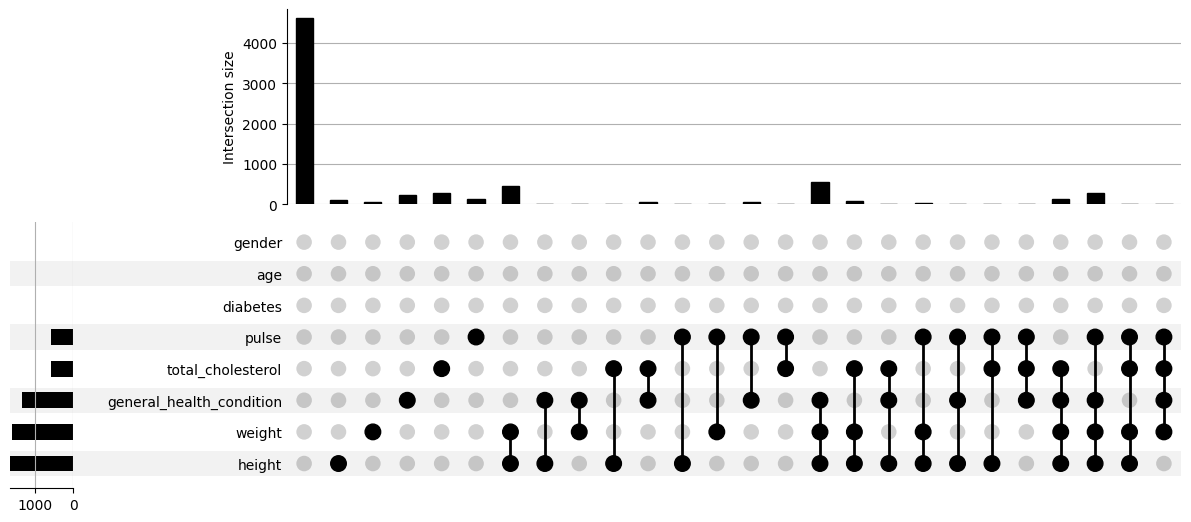

In [11]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)
plt.show()

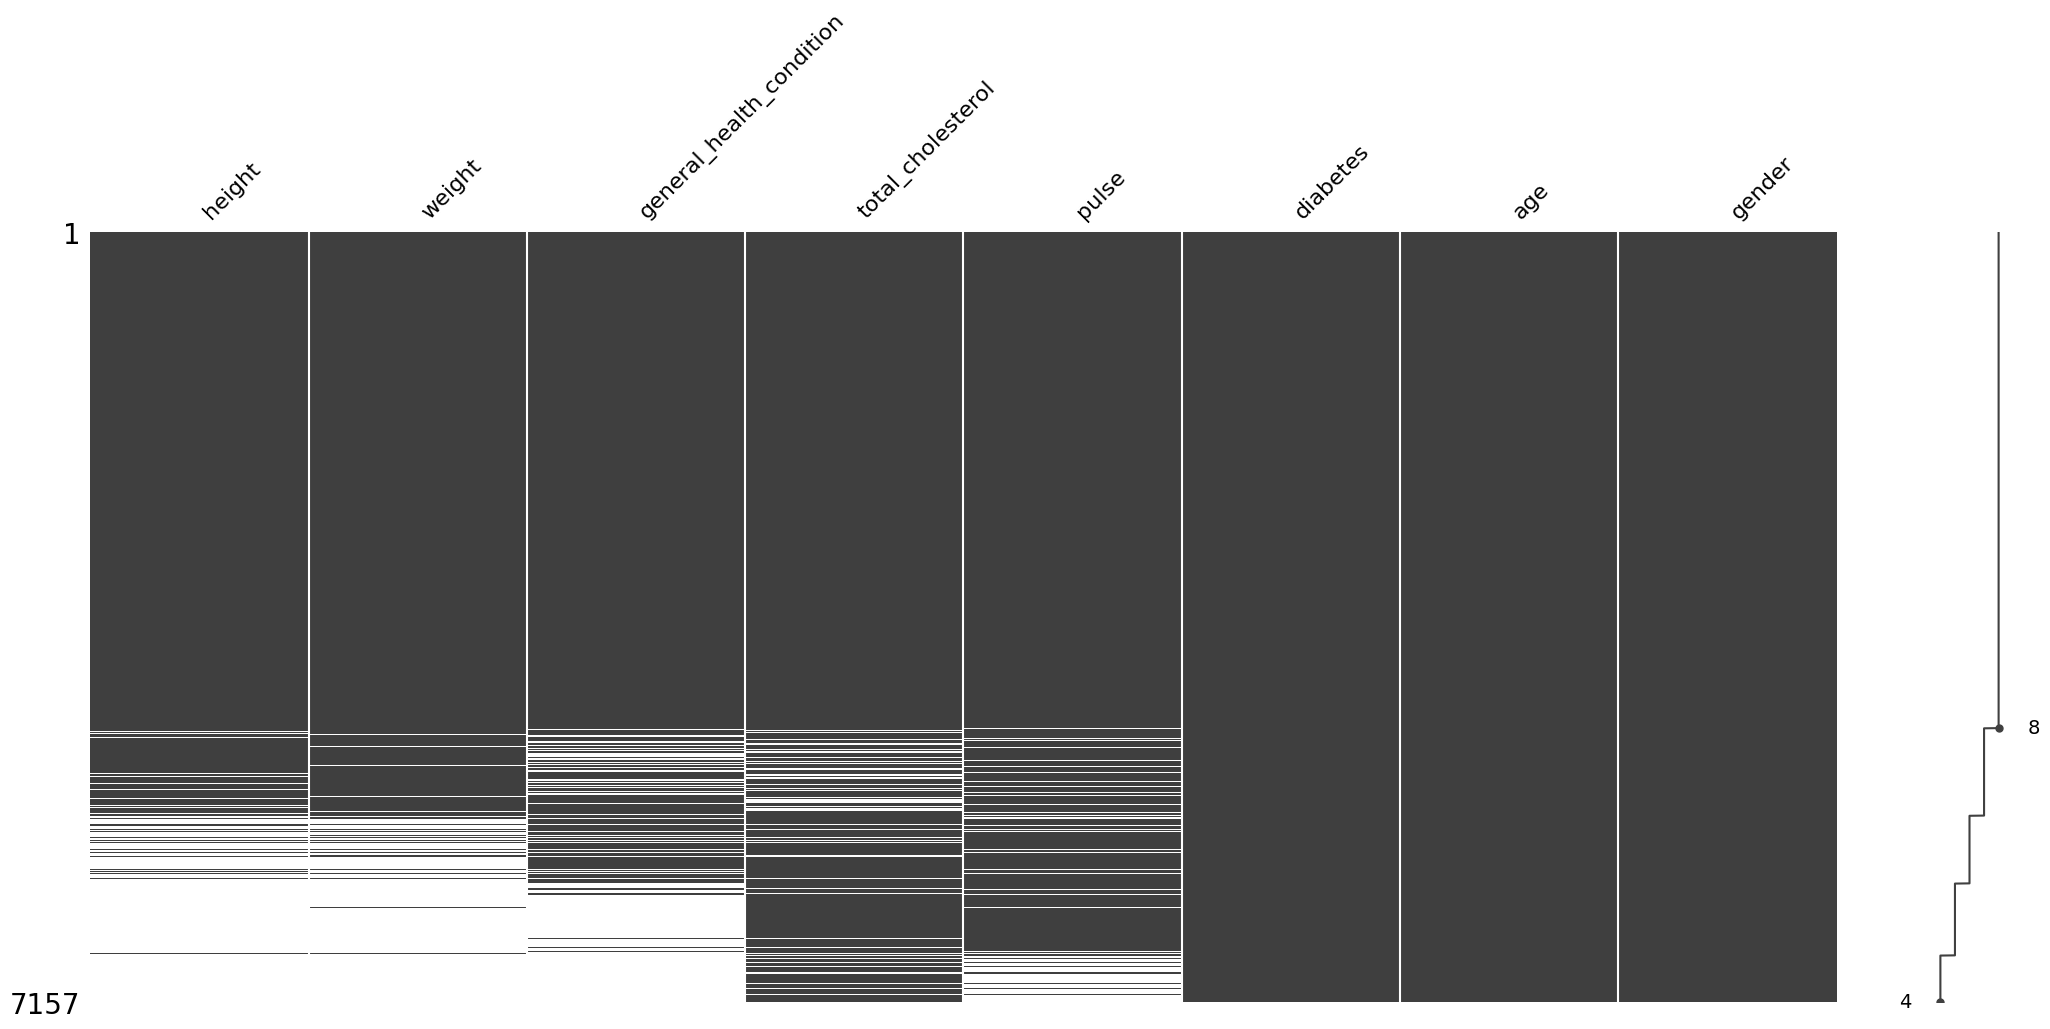

In [12]:
(
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(lambda df: missingno.matrix(df, sort="descending"))
)
plt.show()

## Eliminar valores faltantes

In [8]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all"
    )
)

nhanes_df.shape

(7157, 8)